In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
dataset1 = pd.read_csv('/content/sample.csv')
X = dataset1[['input']].values
y = dataset1[['output']].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [51]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [53]:
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10, 14)
        self.fc4 = nn.Linear(14, 1)
        self.relu = nn.ReLU()
        self.history={'loss':[]}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [54]:
suriya=NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(suriya.parameters(), lr=0.001)

In [55]:
def train_model(suriya, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(suriya(X_train), y_train)
        loss.backward()
        optimizer.step()

        suriya.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [56]:
train_model(suriya, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 1284194.000000
Epoch [200/2000], Loss: 1257737.750000
Epoch [400/2000], Loss: 1129124.500000
Epoch [600/2000], Loss: 868800.312500
Epoch [800/2000], Loss: 520237.000000
Epoch [1000/2000], Loss: 230014.406250
Epoch [1200/2000], Loss: 134395.437500
Epoch [1400/2000], Loss: 116515.414062
Epoch [1600/2000], Loss: 95520.609375
Epoch [1800/2000], Loss: 73850.328125


In [57]:
with torch.no_grad():
    test_loss = criterion(suriya(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 62165.781250


In [58]:
loss_df = pd.DataFrame(suriya.history)

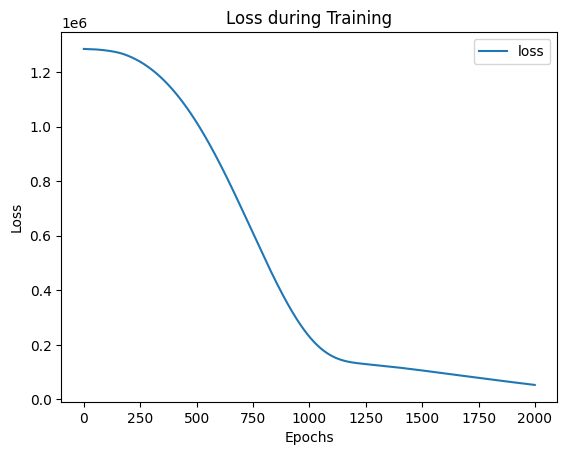

In [59]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [61]:
X_n1_1 = torch.tensor([[90]], dtype=torch.float32)
prediction = suriya(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 1005.3451538085938
